# Depth of investigation with AEM

Purpose of code...
Code based on Doug code xxxx. Conversion of Ross Brodie's Matlab code that examines the depth of investigation with AEM

Pre-requirements... Save output xxx

Overview of this code... # = xxx, ## = user requirement

definitions
DOI 
PDI
RMIT

contact and date...

In [53]:
#import libraries
import pandas as pd
import numpy as np
from pylab import *
from matplotlib import pyplot as plt
import matplotlib as mpl

# User requirement: enter file one details

In [82]:
## User requirement: enter the folder location where the first .dat file is saved
##ensure "/" are used, not "\"
folder1= str(r"C:/Users/u67397/AnacondaProjects/aem/input_data/Tie_lines/")

## User requirement: enter the name of the second .dat file. Include the ".dat" extension
dat1= "4020.asc"

## User requirement: enter the reference model conductivity specified for result file one
reference_EC1 = 0.001

## User requirement: enter the number of layers specified in the reference model
reference_layers= 30

# User requirement: enter the column location for certain data values

In [83]:
##User requirement: enter the location of the xxx data
#change EM
EC_column_min= 22

##User requirement: enter column location of xxx data
depth_column_min= 52

##User requirement: enter column location of xxx data
elevation_column_min=9

line_column = 5
easting_column = 7 
northing_column = 8

# User requirement: enter file two details

In [84]:
## User requirement: enter the folder location where the first .dat file is saved
##ensure "/" are used, not "\"
folder2= str(r"C:/Users/u67397/AnacondaProjects/aem/input_data/Tie_lines_Res/")

## User requirement: enter the name of the second .dat file. Include the ".dat" extension
dat2= '4020.asc'

## User requirement: enter the reference model conductivity specified for result file two
reference_EC2 = 0.1

# User requirement: enter folder location to save files

In [85]:
## User requirement: enter the folder location where to save files into
##ensure "/" are used, not "\"

output_folder= str(r"C:/Users/u67397/AnacondaProjects/aem/output_data/")

#  User requirement: enter reference model influence threshold

In [86]:
## User requirement: enter the reference model influence threshold (rmit) value as a percentage (%). 
#The rmit value relates to the amount of influence that the reference model conductivity has on the output model. 
#The final DOI is defined by this threshold. 

rmit= 75

# Import, process and save

In [87]:
#define location variables
EC_column_min= EC_column_min - 1
EC_column_max= EC_column_min + reference_layers

depth_column_min= depth_column_min - 1
depth_column_max= depth_column_min + reference_layers

elevation_column_max=elevation_column_min + 1

line_column = line_column-1

easting_column =easting_column-1

northing_column = northing_column-1

In [88]:
# Import EC data for result one
input_dat1= folder1 + dat1
input_data_1=pd.read_fwf(input_dat1, header=None) 
data_1=input_data_1.iloc[:,EC_column_min:EC_column_max].transpose().reset_index(drop=True) ###note to explain change to EC
datlen=len(input_data_1.index)

# Import EC data for result two
input_dat2= folder2 + dat2
input_data_2=pd.read_fwf(input_dat2, header=None) 
data_2=input_data_2.iloc[:,EC_column_min:EC_column_max].transpose().reset_index(drop=True)

In [89]:
# Import and format depth details
depth=input_data_1.iloc[1:2,depth_column_min:depth_column_max].transpose().reset_index(drop=True)
depth[1].iloc[-1] = depth[1].iloc[-2]
depth=np.cumsum(depth)
dt=int(depth[1].iloc[0])
db=int(depth[1].iloc[-1])

#Import elevation offset
elevation=input_data_1.iloc[:,elevation_column_min:elevation_column_max].squeeze()

In [90]:
# calculate xxx
rdi = (np.log10(data_2)-np.log10(data_1)) / (np.log10(reference_EC2)- np.log10(reference_EC1))
pdi = 100 * (1-rdi)

In [91]:
# search for values closest to threshold value set at the beginning of this notebook xxx
doi=(np.abs(pdi - rmit))
doi['depth']=depth
doi=doi.set_index('depth')
doi=doi.idxmin(axis=0)

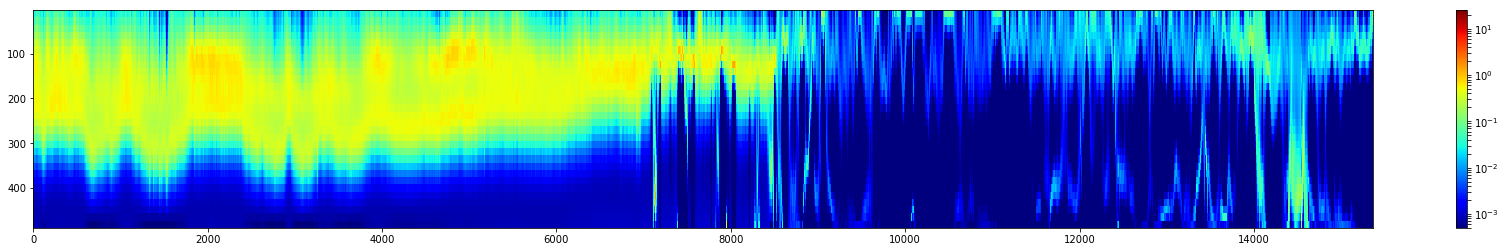

In [93]:
#create a figure that shows EC profile and depth of investigation line for one dataset
plt.figure(figsize =(30,4)) #set size of figure
norm=mpl.colors.LogNorm(vmin=0.0005, vmax=25.01000)#set min and max EC values
im = plt.imshow(data_1, aspect='auto', extent=[0,(datlen-1),db,dt], 
                 norm=norm,
                 cmap=cm.jet) #plot details 
#plt.plot(doi) #add depth of investigation line
plt.colorbar(im) #add colourbar
plt.show() #show plot

In [81]:
#create and save a .csv that contains depth of investigation data for input into Discover PA software
rl=doi.subtract(elevation).to_frame() #subtract elevation data from depth of investigation 
rl['rl_'+str(rmit)+'%']=rl #reformat
rl=rl.drop(rl.columns[[0]], axis=1) #reformat 
rl['total_depth_'+str(rmit)+'%']=doi #add depth of investigation
line = input_data_1[line_column]
line=str(line[0])
rl['line']=line #add line data
rl['easting']=input_data_1[easting_column] #add easting data
rl['northing']=input_data_1[northing_column] #add northing data
rl.to_csv(output_folder+'/'+line+'_depth_data.csv') #save doi data as csv

In [ ]:
# function [pdi,threshdepth,threshdepth_median] = compute_pdi(R1,R2,pctthres,mfilterlength,afilterlength);

# nlayers = size(R1.conductivity,2);

# thickness = [squeeze(R1.thickness(1,:))];%assumes constant thickness along line

# %pretend thickness of last layer is same as second last
# thickness(nlayers) = thickness(nlayers-1);

# dtop = [0 cumsum(thickness(1:nlayers-1))];
# dbot = dtop + thickness;
# dmid = (dtop + dbot)/2;

# np=length(R1.fiducial);
# rdi = (log10(R2.conductivity) - log10(R1.conductivity)) ./ (log10(R2.refcond) - log10(R1.refcond));            
# pdi = 100 * (1 - rdi);    
       
# nthresh = length(pctthres);
# threshdepth = dmid(nlayers)*ones(np,nthresh);
# for i=1:1:nthresh
#     for k=1:1:np
#         li = find(pdi(k,:)>pctthres(i),1,'last');        
#         if(isempty(li))
#             li=nlayers;
#         end        
#         threshdepth(k,i)  = dmid(li);   
#     end
# end


# threshdepth_median = NaN*zeros(np,nthresh);
# for i=1:1:nthresh    
#     dt  = threshdepth(:,i);   
    
#     %median filter
#     dtm = median_filter(dt,mfilterlength);   
    
#     %averaging filter
#     dta = averaging_filter(dtm,afilterlength);   
    
#     threshdepth_median(:,i) = dta;
# end


In [ ]:
# elevation=pd.DataFrame(elevation).transpose()
# depth2=pd.np.tile(depth, datlen)

# elevation=pd.DataFrame(elevation)
# elevation2=pd.np.tile(elevation,(30, 1))

# elevation_offset=elevation2-depth2

In [ ]:
# con = pd.read_csv (r'C:\Users\u67397\AnacondaProjects\aem\input_data/galeisbstdem.con', header=None)#import control file
# con.replace(regex=True,to_replace=r'\t', value=r'', inplace=True) #remove tabs
# EC_1=con[0].shift(-1)[con[0].str.startswith('ReferenceModel Begin')]
# EC_1= EC_1.replace(regex=True,to_replace=r'Conductivity', value=r'').replace(regex=True,to_replace=r'=', value=r'').replace(regex=True,to_replace=r' ', value=r'')
# EC_1=pd.DataFrame(EC_1)
# EC_1

In [ ]:
# #EC=con[0].shift(-1).[con[0].str.contains('ReferenceModel Begin')]#Conductivity')]

# EC=con.loc[con[0].shift(-1).str.contains('ReferenceModel Begin')].fillna(False)
# #EC_1= EC.replace(regex=True,to_replace=r'Conductivity =', value=r'')
# # EC_1=EC_1[0].str.split((' '),expand=True).replace('',np.nan)
# # EC_1.dropna(axis=1,inplace=True)
# # EC_1=(pd.np.tile(EC_1, (datlen, 1)))
# # EC_1=pd.DataFrame(EC_1)
# EC